# Reconocimiento de imagenes Cifar10

### El dataset CIFAR-10 es un conjunto de datos ampliamente utilizado en el campo del aprendizaje automático y la visión por computadora.  consta de 60,000 imágenes en color de tamaño 32x32 píxeles, divididas en 10 clases diferentes, cada una con 6,000 imágenes. 

### Las clases son: avión, automóvil, pájaro, gato, venado, perro, rana, caballo, barco y camión.



## Imports y Set Up

In [1]:
%matplotlib notebook
import os
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
import joblib
import seaborn as sns
import pandas as pd

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import plot_model
from keras.optimizers import Adam
from keras.utils import to_categorical
from datetime import datetime

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, roc_auc_score

## Obtención de los datos

In [2]:
"""
Label   Description
0       airplane
1       automobile
2       bird
3       cat
4       deer
5       dog
6       frog
7       horse
8       ship
9       truck
"""

# Obtenemos los datos de la propia interfaz de Keras
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalizar los valores de píxeles entre 0 y 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-Hot Encoding de las etiquetas
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

### Estudiamos el conjunto de datos

In [3]:
# Vemos la forma de los conjuntos de datos
print("El conjunto de entrenamiento x_train contiene", x_train.shape[0], "imagenes de tamaño",x_train.shape[1],"x",x_train.shape[2], "píxeles" )
print("El conjunto de entrenamiento y_train contiene", y_train.shape[0], "etiquetas con el integer correspondiente")

# Obtener las etiquetas originales
labels = ['Avión', 'Automóvil', 'Pájaro', 'Gato', 'Ciervo', 'Perro', 'Rana', 'Caballo', 'Barco', 'Camión']
index = range(0,10)

decoder = dict(zip(index,labels))
print(decoder)

El conjunto de entrenamiento x_train contiene 50000 imagenes de tamaño 32 x 32 píxeles
El conjunto de entrenamiento y_train contiene 50000 etiquetas con el integer correspondiente
{0: 'Avión', 1: 'Automóvil', 2: 'Pájaro', 3: 'Gato', 4: 'Ciervo', 5: 'Perro', 6: 'Rana', 7: 'Caballo', 8: 'Barco', 9: 'Camión'}


In [4]:
decoder.values()

dict_values(['Avión', 'Automóvil', 'Pájaro', 'Gato', 'Ciervo', 'Perro', 'Rana', 'Caballo', 'Barco', 'Camión'])

### Verificamos la distribución de etiquetas

In [5]:
# Contar la frecuencia de cada etiqueta en el conjunto de entrenamiento (train)
frecuencia_etiquetas_train = np.sum(y_train, axis=0)
print("Frecuencia etiquetas entrenamiento")
print(frecuencia_etiquetas_train)

# Contar la frecuencia de cada etiqueta en el conjunto de prueba (test)
frecuencia_etiquetas_test = np.sum(y_test, axis=0)
print("Frecuencia etiquetas de prueba")
print(frecuencia_etiquetas_test)

Frecuencia etiquetas entrenamiento
[5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000.]
Frecuencia etiquetas de prueba
[1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]


#### Las etiquetas están perfectamente distribuidas

### Mostramos algunas imágenes

<IPython.core.display.Javascript object>


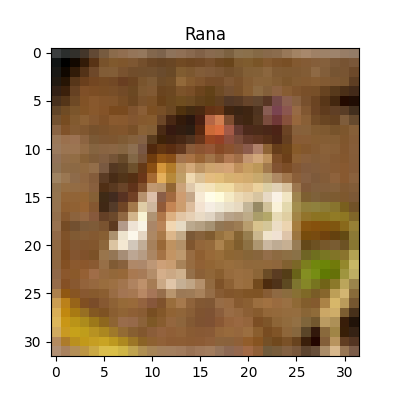

<IPython.core.display.Javascript object>


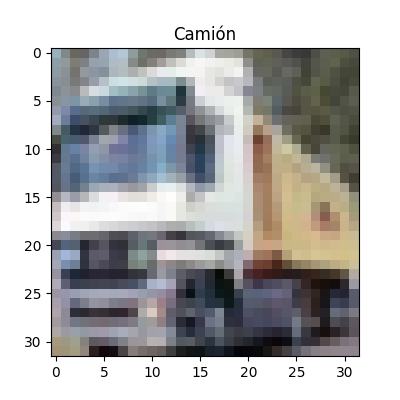

<IPython.core.display.Javascript object>


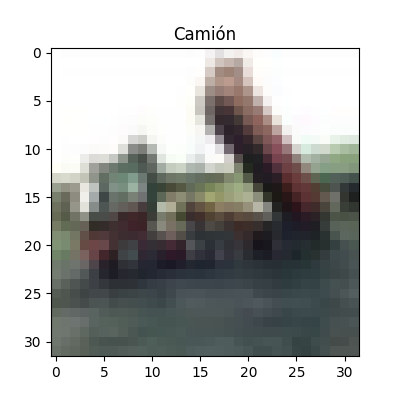

<IPython.core.display.Javascript object>


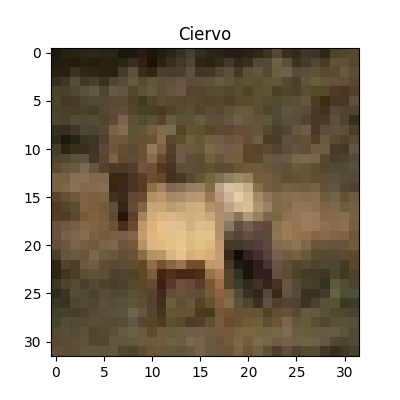

<IPython.core.display.Javascript object>


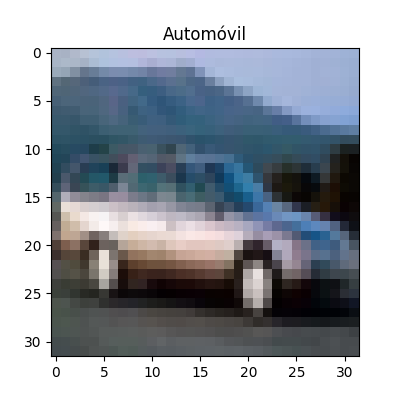

In [6]:
for image in range(5):
    plt.figure(figsize=(4, 4))
    plt.imshow(x_train[image])
    plt.title(decoder[np.argmax(y_train[image])])
    plt.show()

## Construimos un modelo 

In [7]:
# Definir el modelo
model = Sequential()

# Agregar capas convolucionales y de pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Aplanar los datos para las capas densas
model.add(Flatten())

# Agregar capas densas con dropout
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Agregar dropout con una tasa de 0.5

# Agregar capas densas con dropout
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Agregar dropout con una tasa de 0.5

# Agregar capa de salida
model.add(Dense(10, activation='softmax'))

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy',  metrics=['accuracy'])

### Resumen del modelo

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 64)          0

### Dibujamos el esquema del modelo

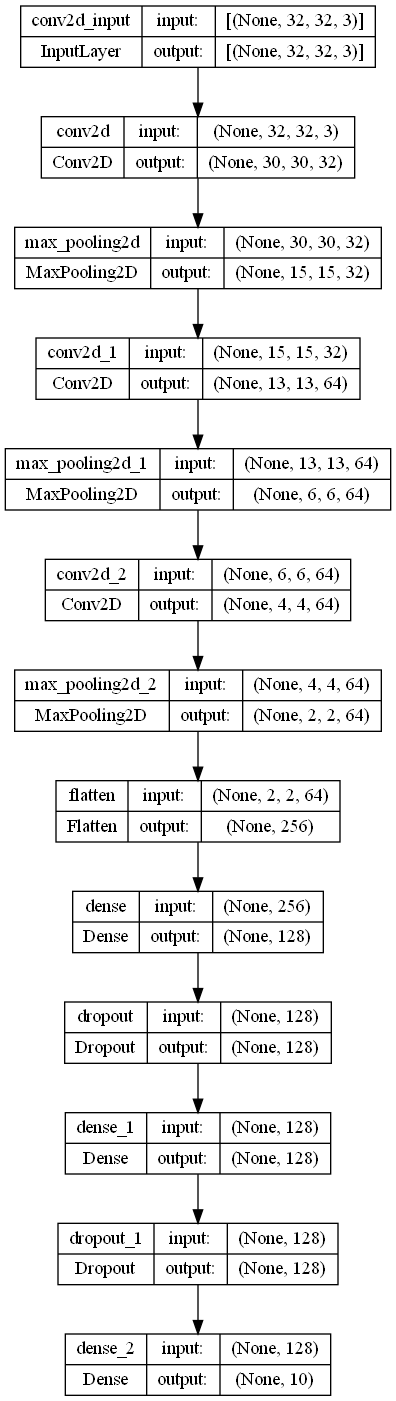

In [9]:
plot_model(model, to_file='modelo.png', show_shapes=True)

## Entrenamos el Modelo

In [10]:
# Configuración del entrenamiento
epochs = 25 
batch_size = 128 

In [11]:
"""
# Entrenar el modelo y guardar los registros de TensorBoard
# Para evitar entrenar cada vez que se usa el notebook, exportamos el modelo entrenado para simplemente cargarlo 

history = model.fit(x_train, y_train, epochs= epochs, batch_size= batch_size, validation_data=(x_test, y_test))

# Guardamos el modelo entrenado y su historial
joblib.dump(model, 'model_1.joblib')
joblib.dump(history.history, 'history_model1.joblib')
"""


"\n# Entrenar el modelo y guardar los registros de TensorBoard\n# Para evitar entrenar cada vez que se usa el notebook, exportamos el modelo entrenado para simplemente cargarlo \n\nhistory = model.fit(x_train, y_train, epochs= epochs, batch_size= batch_size, validation_data=(x_test, y_test))\n\n# Guardamos el modelo entrenado y su historial\njoblib.dump(model, 'model_1.joblib')\njoblib.dump(history.history, 'history_model1.joblib')\n"

## Estudiamos el modelo entrenado

In [12]:
# Carga el modelo entrenado y su historial desde el archivo
model1 = joblib.load('model_1.joblib')
history1 = joblib.load('history_model1.joblib')

### Evaluación del modelo

In [13]:
loss, accuracy = model1.evaluate(x_test, y_test)
print(f'Pérdida en el conjunto de pruebas: {loss:.4f}')
print(f'Precisión en el conjunto de pruebas: {accuracy:.4f}')

313/313 [==============================] - 1s 3ms/step - loss: 0.8701 - accuracy: 0.7194
Pérdida en el conjunto de pruebas: 0.8701
Precisión en el conjunto de pruebas: 0.7194


### Comprobamos su capacidad de aprendizaje

<IPython.core.display.Javascript object>


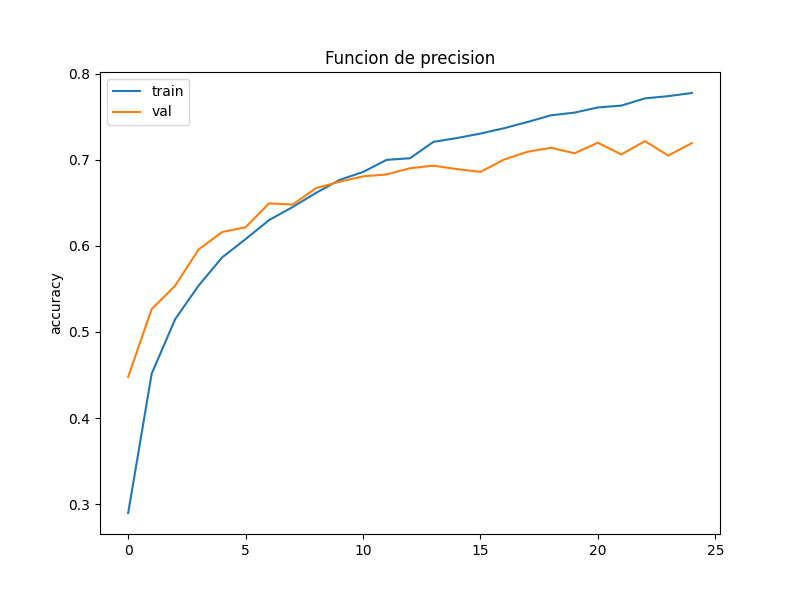

<IPython.core.display.Javascript object>


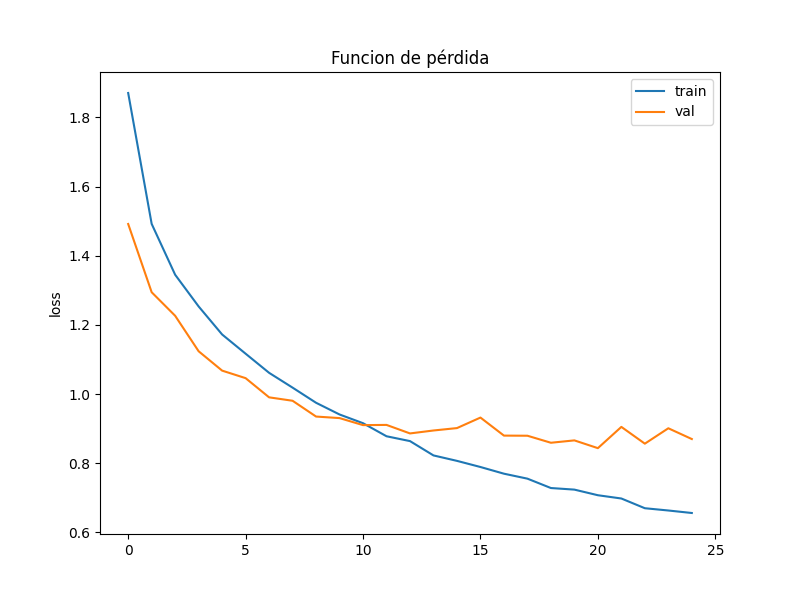

In [14]:
# Imprimimos su función de precisión
plt.figure(figsize=(8, 6))
plt.plot(history1['accuracy'][:epochs], label='train')
plt.plot(history1['val_accuracy'][:epochs], label='val')
plt.ylabel('accuracy')
plt.legend()
plt.title("Funcion de precision")
plt.show()

# Imprimimos su función de pérdida
plt.figure(figsize=(8, 6))
plt.plot(history1['loss'][:epochs], label='train')
plt.plot(history1['val_loss'][:epochs], label='val')
plt.ylabel('loss')
plt.legend()
plt.title("Funcion de pérdida")
plt.show()

#### El modelo parece que sufre de over-fitting, observamos cuando exáctamente 

<IPython.core.display.Javascript object>


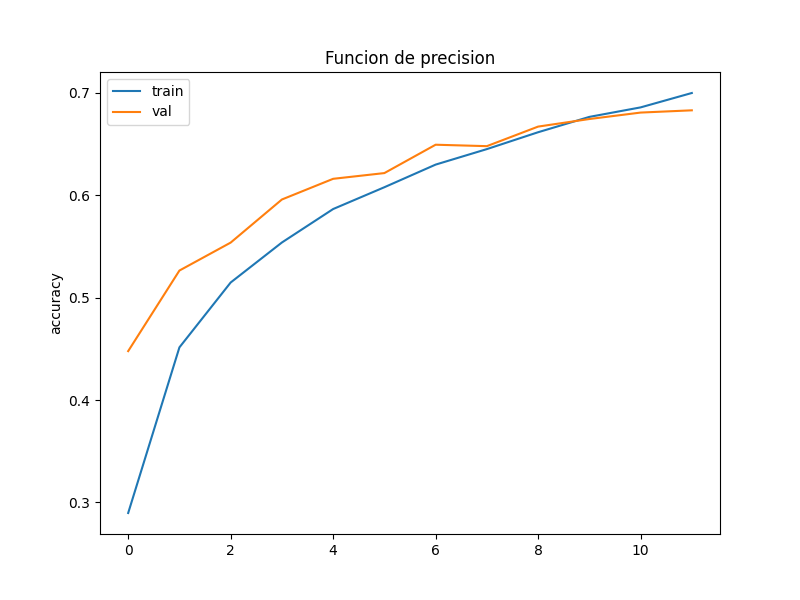

<IPython.core.display.Javascript object>


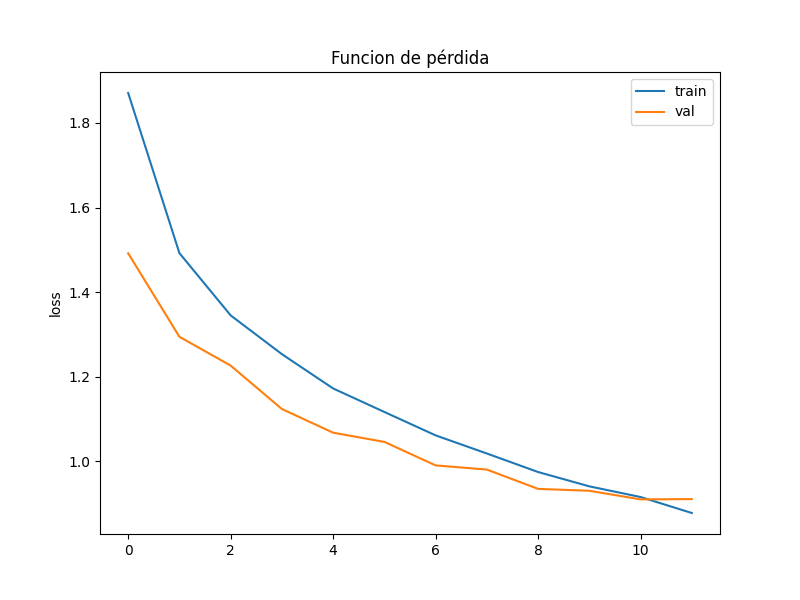

In [15]:
epochs = 12

# Imprimimos su función de precisión
plt.figure(figsize=(8, 6))
plt.plot(history1['accuracy'][:epochs], label='train')
plt.plot(history1['val_accuracy'][:epochs], label='val')
plt.ylabel('accuracy')
plt.legend()
plt.title("Funcion de precision")
plt.show()

# Imprimimos su función de pérdida
plt.figure(figsize=(8, 6))
plt.plot(history1['loss'][:epochs], label='train')
plt.plot(history1['val_loss'][:epochs], label='val')
plt.ylabel('loss')
plt.legend()
plt.title("Funcion de pérdida")
plt.show()

#### Parece que a patir de la octava/novena época empieza a sobre entrenarse

### Construimos su matriz de confusión

313/313 [==============================] - 1s 3ms/step


<IPython.core.display.Javascript object>


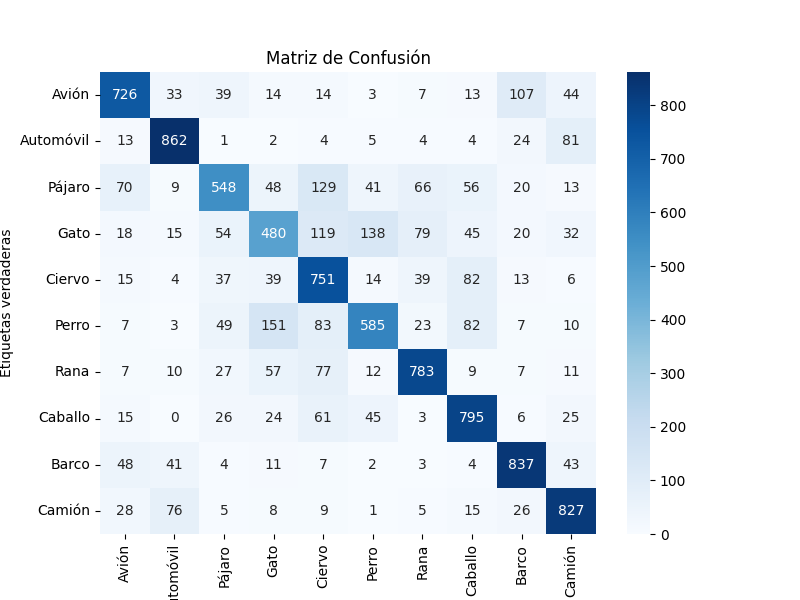

In [16]:
# Obtener predicciones del modelo
y_pred = model1.predict(x_test)

# Convertir las predicciones y etiquetas a clases
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test_classes, y_pred_classes)

# Imprimir la matriz de confusión como un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de Confusión')
plt.show()

### Observamos el rendimiento en la clasificación de cada etiqueta

<IPython.core.display.Javascript object>


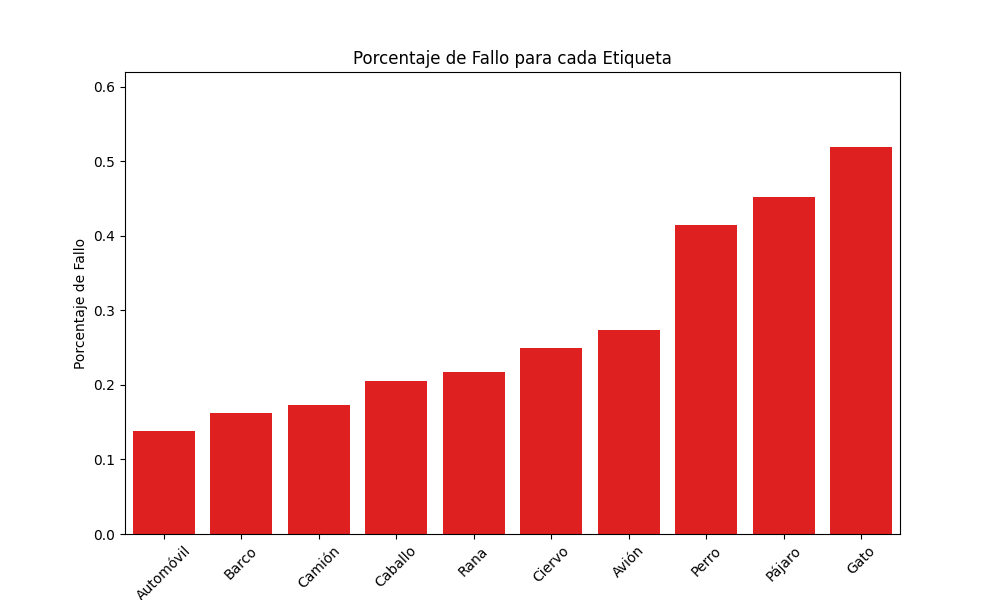

In [17]:
# Calcular el porcentaje de fallo para cada clase
fallos = np.sum(confusion, axis=1) - np.diag(confusion)
porcentaje_fallos = fallos / np.sum(confusion, axis=1)

# Crear un DataFrame con las etiquetas y porcentajes de fallo
df_porcentaje_fallos = pd.DataFrame({'Etiqueta': labels, 'Porcentaje de Fallo': porcentaje_fallos})

# Ordenar el DataFrame por porcentaje de fallo de forma descendente
df_porcentaje_fallos = df_porcentaje_fallos.sort_values(by='Porcentaje de Fallo', ascending=True)

# Crear el gráfico de barras ordenado
plt.figure(figsize=(10, 6))
sns.barplot(x='Etiqueta', y='Porcentaje de Fallo', data=df_porcentaje_fallos, color='r')

# Personalizar el gráfico
plt.xlabel('Etiquetas')
plt.ylabel('Porcentaje de Fallo')
plt.title('Porcentaje de Fallo para cada Etiqueta')
plt.ylim(0, max(df_porcentaje_fallos['Porcentaje de Fallo'] + 0.1))
plt.xticks(rotation=45)
plt.show()

### Generamos el reporte de clasificación

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.77      0.73      0.75      1000
           1       0.82      0.86      0.84      1000
           2       0.69      0.55      0.61      1000
           3       0.58      0.48      0.52      1000
           4       0.60      0.75      0.67      1000
           5       0.69      0.58      0.63      1000
           6       0.77      0.78      0.78      1000
           7       0.72      0.80      0.76      1000
           8       0.78      0.84      0.81      1000
           9       0.76      0.83      0.79      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



<IPython.core.display.Javascript object>


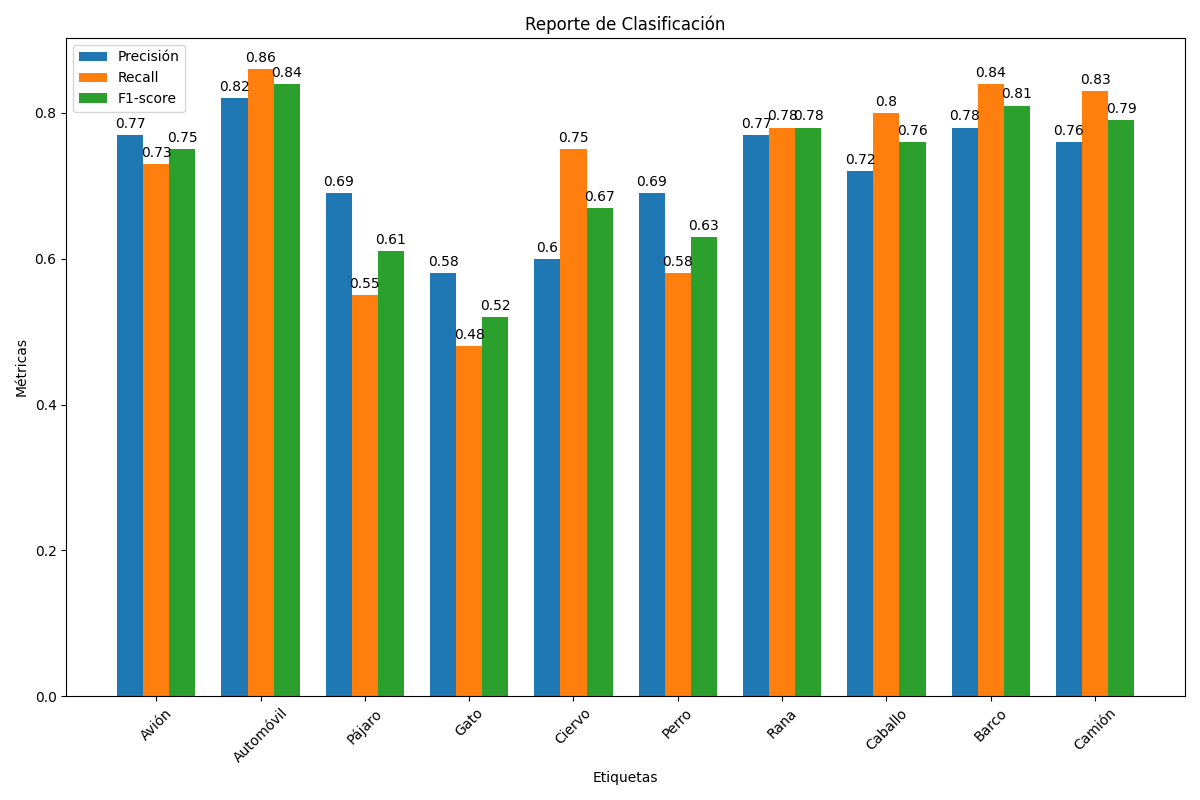

In [18]:
# Generar el reporte de clasificación
report = classification_report(y_test_classes, y_pred_classes) 
print("Reporte de Clasificación:")
print(report)

# Obtener las métricas de precisión, recall y F1-score para cada clase
precisions = []
recalls = []
f1_scores = []

lines = report.split('\n')
for line in lines[2:-3]:
    line_data = line.split()
    if len(line_data) >= 4:
        precisions.append(float(line_data[1]))
        recalls.append(float(line_data[2]))
        f1_scores.append(float(line_data[3]))

# Crear el gráfico de barras
x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width, precisions, width, label='Precisión')
rects2 = ax.bar(x, recalls, width, label='Recall')
rects3 = ax.bar(x + width, f1_scores, width, label='F1-score')

ax.set_xlabel('Etiquetas')
ax.set_ylabel('Métricas')
ax.set_title('Reporte de Clasificación')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()


### Calculamos el área bajo la curva

<IPython.core.display.Javascript object>


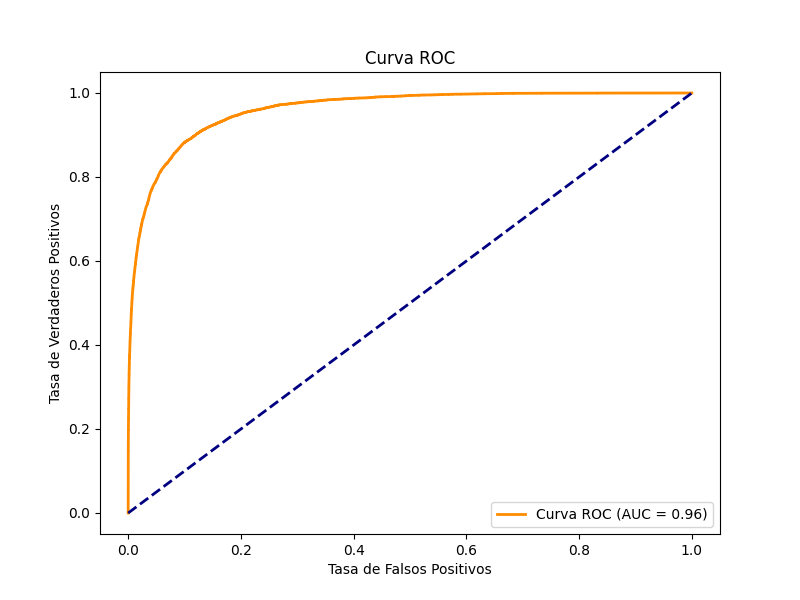

In [19]:
# Calcular el área bajo la curva ROC
roc_auc = roc_auc_score(y_test, y_pred, average='macro')

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test.ravel(), y_pred.ravel())

# Crear el gráfico de la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

#### Un area bajo la curva de 0.96 indica un muy buen desempeño del modelo